In [1]:
import numpy as np
import pandas as pd

In [279]:
dff_2 = pd.read_csv('bank-additional-full.csv',delimiter=";")

In [280]:
dff_2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [281]:
len(dff_2)

41188

Preface to project:

Nowadays Banks are massively investing on the marketing campaigns that calls for the need of optimizing strategies & improving on its effectiveness. on their journey, understanding their customers in a dynamic profiling will eventually help banks to captivate on their campaign yielding manisfatory customer satisfaction.!

main objective of this project analysis : to increase effectiveness of bank's telemarketing campaign by majorly 
1.) reducing marketing cost as much as possible
2.) increase acquiring prospects to major extent

At the end, this report will help bank to have a granular level understanding of their customers by means of which they can direct more appropriate targeted marketing plans on them.understanding customer's transaction history record & demographics,  will not only help banks to secure more deposits but also counterpart on advertisements made to non-prospect customers.


data level understanding:

we have 41,188 number or records of customers & 20 attributes which signifies different information about customers namely: age, job, martial status, educational level etc. 

we also have one target variable which is a classification variable basically dividing records into whether the customer subscribed to a term deposit or not.

In [282]:
#lets check whether we have any null values with us!
dff_2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

we certainly dont have direct missing values with us but we do have other inputs like "unknown","others" which are as essential to be removed as null values as they are extremely meaningless.!

for sake of this analysis, we are replacing "unknowns" with "other" just to create another category under specific category.

# Data cleaning!

In [283]:
dff_2.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [284]:
dff_2['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [285]:
dff_2['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [286]:
dff_2['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [287]:
dff_2['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [288]:
dff_2['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [289]:
dff_2['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [290]:
dff_2['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [291]:
dff_2['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [292]:
dff_2['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [293]:
dff_2['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [43]:
#filling 'unknown' with 'others'

In [302]:
dff_2[['housing','loan']] = dff_2[['housing','loan']].replace(['unknown'],'other')

In [303]:
dff_2[['default','education','marital','job']] = dff_2[['default','education','marital','job']].replace(['unknown'],'other')

# Creating & Transforming data 

In order to make certain attributes simpler & transforming certain units & data types for easier analysis.

In [304]:
# Step 1: Converting column : 'y' to 'response'
dff_2.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(dff_2, new_column, old_column):
    dff_2[new_column] = dff_2[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dff_2[new_column].value_counts()

convert(dff_2, "response_binary", "response")

0    35016
1     4389
Name: response_binary, dtype: int64

In [305]:
#step 2 : dropping contact column as it makes no relevance to go ahead with it.
dff_2 = dff_2.drop('contact', axis=1)

KeyError: "labels ['contact'] not contained in axis"

In [306]:
# Step 3: Converting the unit of 'duration' from seconds to minutes
dff_2['duration'] = dff_2['duration'].apply(lambda n:n/60).round(2)

In [307]:
#Step 4: Dropping rows that 'duration' < 5s
condition2 = (dff_2['duration']<5/60)
dff_2 = dff_2.drop(dff_2[condition2].index, axis = 0, inplace = False)

In [308]:
# Step 5: Dropping customers with 'other' education
condition3 = (dff_2['education'] == 'other')
dff_2 = dff_2.drop(dff_2[condition3].index, axis = 0, inplace = False)

# Exploratory Data Analysis!

In [110]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

For sake of analysis, not going as per normal flow of univariate, bivariate & multivariate analysis but visualizing only those variables which have significance of visualization!

In [111]:
#seeing distribution of age

Text(0.5,1,'Age distribution')

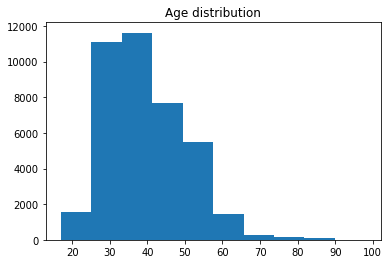

In [167]:
plt.hist(dff_2['age'])
plt.title('Age distribution')

It can be reflected that majorly the customers are having age ranging from 18 to 95 years old. however, major population of customers called falls in the age range of 30's to 40's. The distribution looks normal with slight std dev.

In [117]:
#seeing distribution of duration & campaign

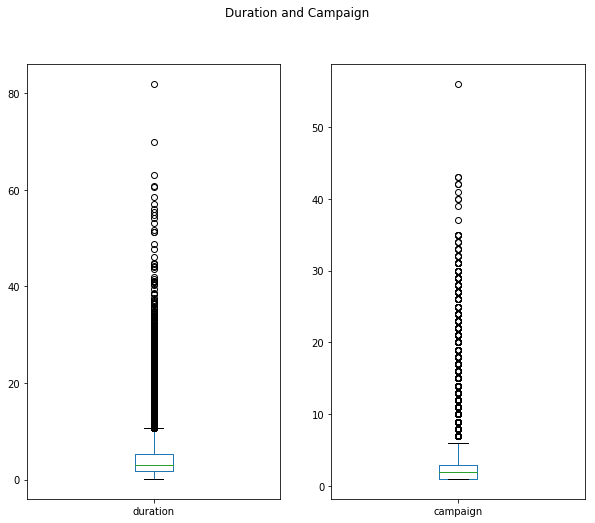

In [168]:
dist_dur = dff_2[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (10,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='Duration and Campaign')
plt.show()

The plot of "duration" shows that calls have a median of 3. also it can be noted that calls are extensively of small duration as the boxplot is majorly left skewed. also, this plot opens ways to further study for calls ranging from 10 - 40 mins which are outliers as per data.

The plot of "campaign" reflects following points:
1.) nearly half of them have been contact for second.
2.) It is reasonable to see that most of the customers are been contacted for once or thrice.
3.) Also certian abnormality is been shown i.e. few of them are been contacted to as high as 58% of time.

In [121]:
#seeing how "duration" & "campaigns" behaves w.r.t response variable

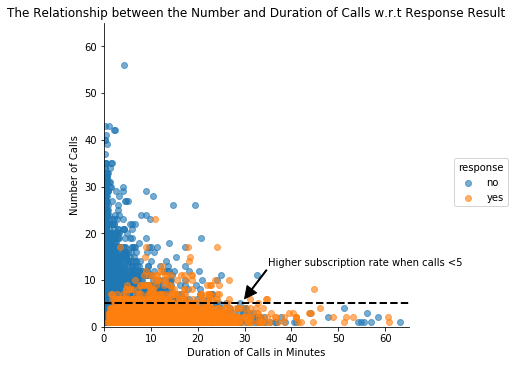

In [230]:
dur_cam_res = sns.lmplot(x='duration', y='campaign',data = dff_2,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6})

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls in Minutes')
plt.title('The Relationship between the Number and Duration of Calls w.r.t Response Result')


plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

observed points:

1.) compared to clients who do not take term deposit, clients who take have been contacted less time & also have long duration calls.
2.) the most notable observation over here is that after 5 campaigns customers rejects the term deposit unless it holds long duration.
3.) majority of "yes" clients have been contacted by less than 10 times in number.

suggested points:
1.) bank should'nt be calling customers more than 5 times as it results in extremely high dissatisfaction.!

In [126]:
#visualizing subcription & contact age by rate

In [231]:
lst = [dff_2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [232]:
count_age_response_pct = pd.crosstab(dff_2['response'],dff_2['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

In [233]:
age = pd.DataFrame(dff_2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

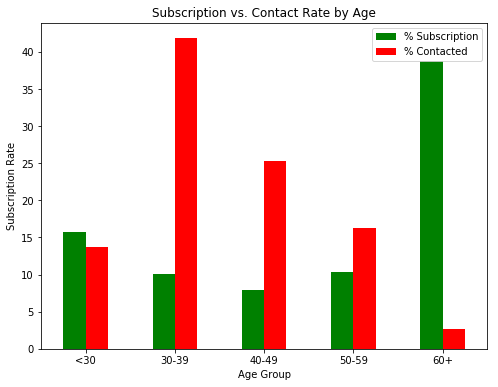

In [234]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

Insight: Target the youngest & oldest aged except middle-aged!

with the green vertical bars it can be seen that clients with age group of 60 + have highest subcription age.from customers aged 18 to 29, 17% of subscriptions came. likewise, youngest & oldest customers make about more than 50% subscriptions.

It is also a quiet reasonable observation because generally it has been seen that elder aged people are more prone to investments having least risk involved such like term deposits. on the other hand middle aged people are highly aggresive & have more focus towards generating high investment income.

Also when we draw focus to youngest students, it is viable to say that they must not be having enough money & also professional knownledge when it comes to investing in mutual funds etc. but with the lucrative features of term deposit like high liquiditity & generating high interest incomes when compared to savings accounts, it is reasonable that it has drawn major attention from young students.

Howsoever, with the red bars it can be seen that banks are targetting middle aged people more compared to young & elder age group people that has eventually led to decreased rate of subcriptions. Thus it is advisable to change their target set of customers to yield more conversion of acceptance.

In [133]:
#Visualize the subscription rate by job

In [235]:
count_job_response_pct = pd.crosstab(dff_2['response'],dff_2['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

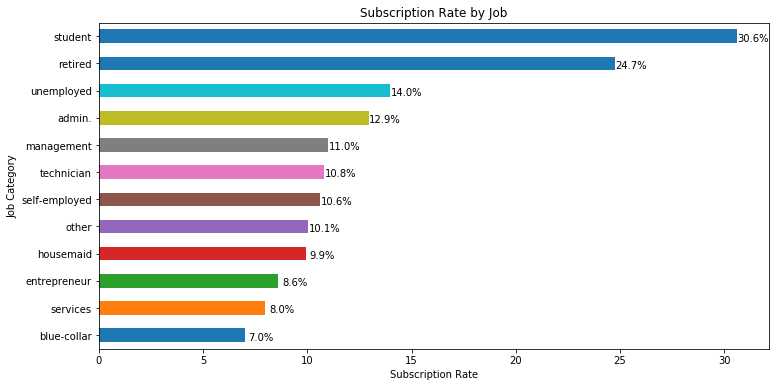

In [236]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Labelling each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Insights : target students & elder or retired clients 

From the above plot it can be percieved that students & retired clients bring more than 50% subscriptions which is in-turn sink with the observations from previous plot. Thus it is advisable that they should direct their target customers towards this set of people.

# Machine Learning : Classification

The major objective of this analysis report is to find those customers who have high conversion/ acceptance behaviour as directing your energy towards these set of customers will eventually lead to more efficiency & effectiveness of campaigns.This would be achieved by buidling a classification model and descripting whether the customers have accepted the proposal as per the previous marketing campaign.

In [309]:
dff_2.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
4,56,services,married,high.school,no,no,yes,may,mon,0.09,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
8,24,technician,single,professional.course,no,yes,no,may,mon,0.11,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
16,35,blue-collar,married,basic.6y,no,yes,no,may,mon,0.09,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
17,46,blue-collar,married,basic.6y,other,yes,yes,may,mon,0.12,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
18,50,blue-collar,married,basic.9y,no,yes,yes,may,mon,0.10,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [179]:
#selecting relevant variables for classification

For considering attributes for building classification model only variables/features revealing high information such as job_title, education, age, default record, housing record & loan record. for same purpose information like 'contacts made before the campaign' are dropped for further analysis.

In [310]:
dff_2.drop(['marital'],axis=1, inplace=True)

In [311]:
dff_2.head()

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
4,56,services,high.school,no,no,yes,may,mon,0.09,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
8,24,technician,professional.course,no,yes,no,may,mon,0.11,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
16,35,blue-collar,basic.6y,no,yes,no,may,mon,0.09,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
17,46,blue-collar,basic.6y,other,yes,yes,may,mon,0.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
18,50,blue-collar,basic.9y,no,yes,yes,may,mon,0.10,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [210]:
#creating new data set with just relevant features!

In [312]:
dff_3 = dff_2[['age','job','education','default','housing','loan']]

In [313]:
dff_3 = pd.get_dummies(dff_3, columns = ['job'])

In [314]:
dff_3.head()

,age,education,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
4,56,high.school,no,no,yes,0,0,0,0,0,0,0,0,1,0,0,0
8,24,professional.course,no,yes,no,0,0,0,0,0,0,0,0,0,0,1,0
16,35,basic.6y,no,yes,no,0,1,0,0,0,0,0,0,0,0,0,0
17,46,basic.6y,other,yes,yes,0,1,0,0,0,0,0,0,0,0,0,0
18,50,basic.9y,no,yes,yes,0,1,0,0,0,0,0,0,0,0,0,0


In [315]:
dff_3 = pd.get_dummies(dff_3, columns = ['education'])

In [316]:
dff_3['housing'] = dff_3['housing'].map({'yes': 1, 'no': 0})

In [317]:
dff_3['default'] = dff_3['default'].map({'yes': 1, 'no': 0})

In [318]:
dff_3['loan'] = dff_3['loan'].map({'yes': 1, 'no': 0})

In [319]:
dff_3.head()

,age,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,...,job_student,job_technician,job_unemployed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
4,56,0.0,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,24,0.0,1.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
16,35,0.0,1.0,0.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17,46,NaN,1.0,1.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18,50,0.0,1.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [320]:
dff_3 = df_3.dropna()

In [321]:
dataset_response = pd.DataFrame(df['response_binary'])

In [322]:
dff_3 = pd.merge(dff_3, dataset_response, left_index = True, right_index = True)

In [324]:
dff_3.head()

,age,default,housing,loan,day_of_week,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unemployed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,response_binary_x,response_binary_y
0,56,0.0,0.0,0.0,mon,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,37,0.0,1.0,0.0,mon,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,40,0.0,0.0,0.0,mon,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,56,0.0,0.0,1.0,mon,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,59,0.0,0.0,0.0,mon,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [325]:
dff_3.drop(['day_of_week'],axis=1, inplace=True)

In [326]:
dff_3.head()

,age,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,...,job_unemployed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,response_binary_x,response_binary_y
0,56,0.0,0.0,0.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,37,0.0,1.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,40,0.0,0.0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,56,0.0,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,59,0.0,0.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [263]:
#defining x & y : basically defining predictor & target variables!

In [328]:
array = dff_3.values

# Features: first 20 columns
x = array[:,0:-1]

# Target variable: 'response_binary'
y = array[:,-1]

In [266]:
#train-test split

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [329]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 7
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=test_size, random_state=seed)

In [269]:
#comparing classification algorithm

For sake of classification problem we are buidling model using : logistic regression, k-neighbors classifier, decision tree classifier & gaussian NB. Model which is best performing in terms of accuracy will be further be used to build up model.

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [272]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [332]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed)    
    # train the model
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,scoring = "accuracy")    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
KNN: 0.958810 (0.004429)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)


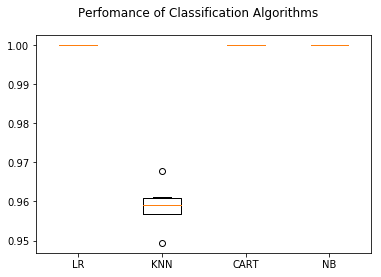

In [333]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

It can be seen that amongst all the models: LR,CART & NB models are extensively overfitting & thus we are going ahead with KNN model which is showing accuracy of 95% which is reasonably accepted.

In [334]:
knn = KNeighborsClassifier()

In [335]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [336]:
knn_predict = knn.predict(x_test)

In [337]:
print(accuracy_score(y_test, knn_predict))

0.9601567602873938


Accuracy basically signifies correct predictions out of all the predictions. KNN model gives accuracy of 96% which is really well value to reply for segmenting customers.

[[5377    2]
 [ 242  503]]


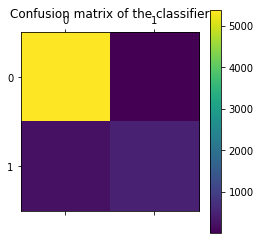

In [338]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(y_test, knn_predict))

cm = confusion_matrix(y_test, knn_predict)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()


However, in case of an unbalance dataset accuracy as a meassure can thereby lead to misleading results. In such cases confusion matrix plays a vital role as it gives data breaken into cellular components. Confusion matrix yields a detailed report of predictions v/s actual values.considering test set, the matrix signifies that it yields significant results as most values are correctly predicted. 242 is the value which shows set of customers who are deemed to as accepted term deposit wherein in reality they did not. Thus the problem percieved by this matrix is that: it is hugely biased as a result of which accuracy score is also biased. Due to which it calls for further analysis.

In [340]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_predict))

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      5379
        1.0       1.00      0.68      0.80       745

avg / total       0.96      0.96      0.96      6124



Studying the classification report, it can be infered that knn model has huge potential to predict customers who would not subsribe to term deposit.

# Conclusion!

According to the above analysis, it can be concluded that following customers have high conversion response towards subscription:
1.) customers with age < 30 and age > 60
2.) customers who are either students or retired individuals.

with adhering more towards customers having above two features: The objective provided to reduce marketing cost & increasing acquiring prospects  by a vast number can be successfully achieved.

Using knn model of classification the bank can predict prehand all those customers who are highly likely to reject and not accept term deposit. In this way they can reduct their time, effort and most importantly marketing cost by not investing much on such clients.

# Recommendations!

1.) with the analysis of data specifically pertaining to month of calling it can seen that months namely march, september, october & december have high success rates of conversion to accepting term deposits. But in order to justify to this point, its recommended to collecte some more data and if same observation is persistent then it can be generalized & bank should direct all their campaigns in seasonal time i.e. during fall & spring

2.) They should target customers who are less than 30 and more than 60 in age. Also should direct all their resources towards students & retired individuals. This would help bank to design more competent and effective marketing strategy having higher returns.

3.) Bank has extremely granual level data of customers as to their education status, job status, loan status, etc. all these information can be extensively processed to connect campaigns to life stage of customers. for example lets supose in our analysis we access that customers are pocessing high risk towards claimg term deposit & thus would certainly not be interested to claim one i.e. professionals seeking job just after college have high risk potential and thus wouldnt be interested to claim deposit. As a result of which banks should draft more realistic campaigns.